In [3]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score, RocCurveDisplay
import datetime
import seaborn as sns

In [4]:
#read in data
df = pd.read_csv('data.csv')

#look at data
descdf = df.describe()
print(descdf)


# Ensure the data is sorted by date
df = df.sort_values(by='Date')


       house_price_index  new_private_house_owned  home_supply  \
count          84.000000                84.000000    84.000000   
mean          157.274500               941.273810     7.785714   
std            17.585056               456.058608     2.263548   
min           133.991000               478.000000     4.200000   
25%           143.156500               587.500000     6.100000   
50%           148.377000               731.500000     7.550000   
75%           177.927250              1213.750000     9.300000   
max           184.607000              2273.000000    14.300000   

       recession_indicator  federal_rate   real_income  \
count            84.000000     84.000000     84.000000   
mean              0.214286      1.783929  13943.014560   
std               0.412790      2.171063    446.601342   
min               0.000000      0.070000  13214.527000   
25%               0.000000      0.147500  13608.611500   
50%               0.000000      0.190000  13850.489500   

In [5]:

# Lag the independent variables by six months
lagged_df = df.shift(periods=6)


# Drop rows with NaN values created by the lag
lagged_df = lagged_df.dropna()

In [6]:
# Define the independent variables (economic indices)
X = lagged_df[[
    'house_price_index',
    'new_private_house_owned',
    'home_supply',
    'federal_rate',
    'real_income',
    'consumption_price_index',
    'gdp',
    'treasury_maturity']]

# Define the dependent variable (spread)
y = lagged_df['recession_indicator']


In [7]:
# get summary with Tukey's five number summary for numerical variables
print(df.dtypes)
print(df.columns)

Date                        object
house_price_index          float64
new_private_house_owned      int64
home_supply                float64
recession_indicator          int64
federal_rate               float64
real_income                float64
consumption_price_index    float64
gdp                        float64
treasury_maturity          float64
period                      object
dtype: object
Index(['Date', 'house_price_index', 'new_private_house_owned', 'home_supply',
       'recession_indicator', 'federal_rate', 'real_income',
       'consumption_price_index', 'gdp', 'treasury_maturity', 'period'],
      dtype='object')


In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [9]:
# Fit Random Forest Regressor
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# # Get feature importances
# feature_importances = model.feature_importances_
# # Display feature importances
# importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# print(importance_df.sort_values(by='Importance', ascending=False))


In [11]:
# Predict
y_pred = model.predict(X_test)

In [12]:
# Plot actual vs predicted
df_test = df.iloc[-len(y_test):].copy()
df_test['Predicted Spread'] = y_pred


In [13]:
# # create rsquared to judge model performance
# r2 = r2_score(y_test, y_pred)
# print(f'R-squared: {r2}')

# # create mean absolute error to judge model performance
# mae = mean_absolute_error(y_test, y_pred)
# print(f'Mean Absolute Error: {mae}:2f')

# # create mean squared error to judge model performance
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# # create root mean squared error to judge model performance
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f'Root Mean Squared Error: {rmse}')

# # create mean absolute percentage error
# mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# print(f'Mean Absolute Percentage Error: {mape}')

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[13  0]
 [ 0  3]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



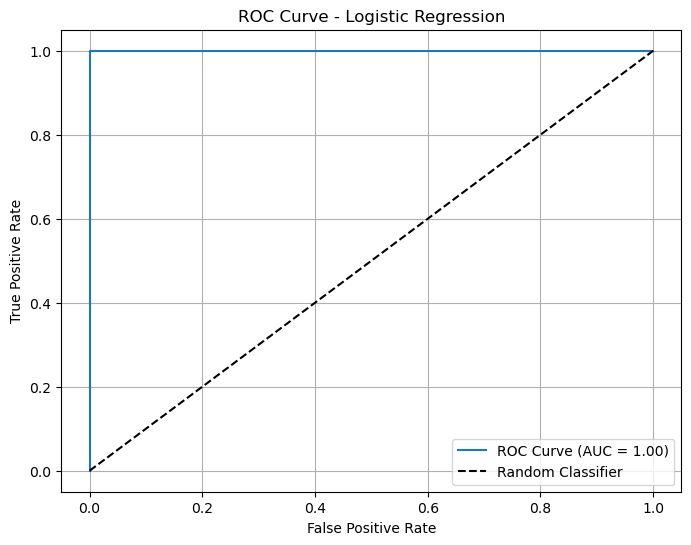

In [ ]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1] 

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()



/var/folders/4p/strpkrbd1y782g01xksphyv40000gn/T/ipykernel_32229/3363146592.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')


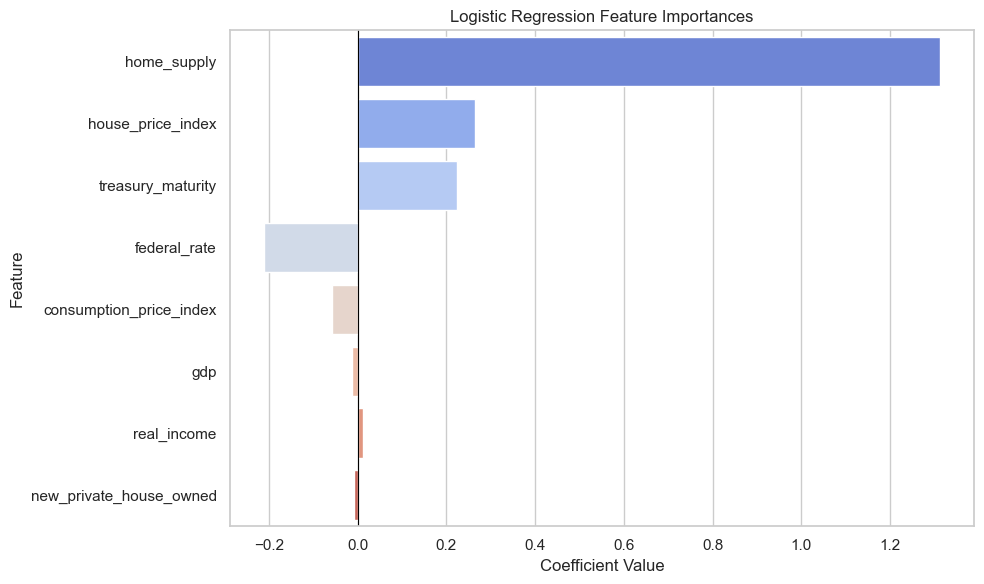

In [21]:
# Extract feature importances from model coefficients
feature_importances = model.coef_[0]
features = X.columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by absolute importance
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Logistic Regression Feature Importances')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.8)  # vertical line at 0
plt.tight_layout()
plt.show()